# Flatiron Mod 3 Project - Tanzania Water Pump Classification with RandomForest


## PROCESS CHECKLIST


1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# Overview

> Problem: Predict which Tanzanian water pumps are functional, which need repairs, and which don't work at all. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania. 

> Audience: Main audience is the pump management companies who handles repairs and construction, along with city officials who work with companies to make decisions on pump location and technology for the pumps used. 

> Business Questions: Do older pumps need more repairs or are more prone to breaking? What is the relationship between population and working or nonworking pumps? Which type of pump to avoid?

> Business Value: A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania. This understanding includes predictability based on location and types of pumps, for faster assessment and follow through. 

# Content
The dataset contains 59,400 training samples and 14,850 test samples, with 40 different features. The training/test set values and training labels are stored in csv. Test set values were used for final testing and then stored as predictiondf_2.csv and submitted to [Drivendata](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) competition site for accuracy. This site is where the dataset was obtained as well. 

## feature desc.

- id number ** - don't need, will match with index
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered **
- funder - Who funded the well **
- gps_height - Altitude of the well
- installer - Organization that installed the well **
- longitude - GPS coordinate
- latitude - GPS coordinate 
- wpt_name - Name of the waterpoint if there is one **
- num_private - **
- basin - Geographic water basin **
- subvillage - Geographic location **
- region - Geographic location **
- region_code - Geographic location (coded) ++
- district_code - Geographic location (coded) ++
- lga - Geographic location **
- ward - Geographic location **
- population - Population around the well
- public_meeting - True/False **
- recorded_by - Group entering this row of data **
- scheme_management - Who operates the waterpoint ++ **
- scheme_name - Who operates the waterpoint ++ **
- permit - If the waterpoint is permitted **
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses ++ **
- extraction_type_group - The kind of extraction the waterpoint uses ++ **
- extraction_type_class - The kind of extraction the waterpoint uses ++
- management - How the waterpoint is managed ++ **
- management_group - How the waterpoint is managed ++
- payment - What the water costs **
- payment_type - What the water costs ++
- water_quality - The quality of the water **
- quality_group - The quality of the water ++
- quantity - The quantity of water **
- quantity_group - The quantity of water ++
- source - The source of the water **
- source_type - The source of the water ++
- source_class - The source of the water ++ **
- waterpoint_type - The kind of waterpoint **
- waterpoint_type_group - The kind of waterpoint

# Method
Tested three different algorithm models:
* Ran several models to find best performance of classification. 
* Looked at most important features involved in classification from model evaluation.
* Followed up with visuals to help explain each variables effect on class.
* Focused mainly on location, population and gravity well pump technology.

# OBTAIN DATA

- Import data, inspect, check for datatypes to convert and null values
- Display header and info.
- Drop any unneeded columns, if known (df.drop(['col1','col2'],axis=1,inplace=True)

In [6]:
from fsds_100719.imports import *

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


## Set plot default and DF show all cols

In [7]:
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)

## Load data

In [8]:
df = pd.read_csv('trainingsetvalues.csv')
training_labels = pd.read_csv('trainingsetlabels.csv')
testdata = pd.read_csv('testsetvalues.csv')

In [9]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

## View data

In [10]:
display(df)
display(training_labels)
display(testdata)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [11]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### add labels to main df

In [12]:
df['status_group'] = training_labels['status_group']
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Check nulls

Notice there are similar nulls in funder and installer cols.

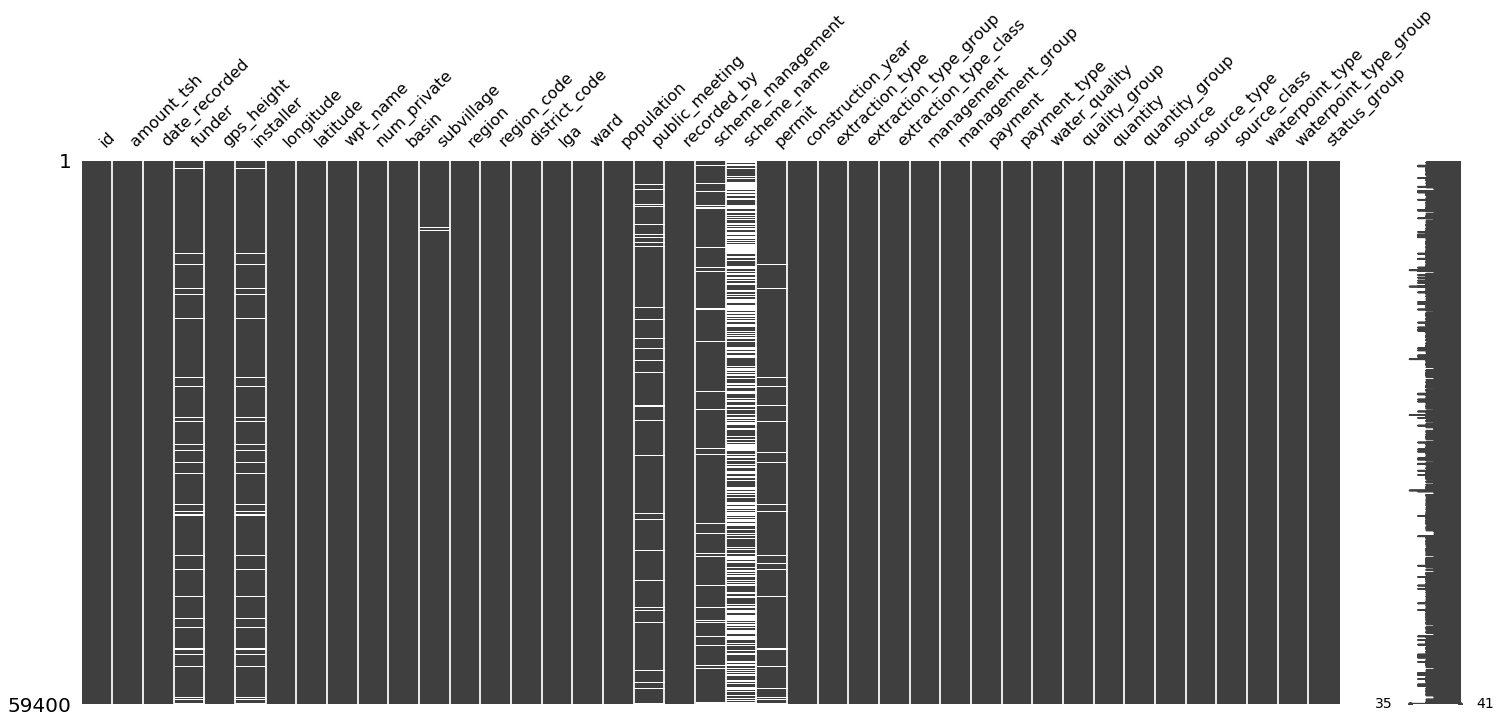

In [13]:
## Check null values
import missingno
missingno.matrix(df)

In [14]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Class imbalance will need to be addressed.

In [15]:
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

## drop null val cols

In [16]:
# """
# cols to delete:
# id ** - don't need, will match with index
# date_recorded - don't need, can't do time series
# funder - Who funded the well - null vals
# installer - Organization that installed the well ** - null vals
# subvillage - Geographic location ** - don't need, cat, using region code, nulls
# public_meeting - True/False - don't need, null vals
# scheme_management - Who operates the waterpoint ++ - nulls, don't need
# scheme_name - Who operates the waterpoint ++ ** - nulls, don't need
# permit - If the waterpoint is permitted - nulls, don't need
# """

In [17]:
cols_to_drop = ['id', 'date_recorded', 'funder',
       'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit']
                
                
df.drop(columns = cols_to_drop ,axis=1, inplace=True)
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'recorded_by', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [18]:
df.isna().sum()

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [19]:
df.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
recorded_by               object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_class              object
waterpoint_type           object
waterpoint

# SCRUB

## checking for weird values

In [20]:
for col in df.columns:
    print(df[col].value_counts())

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64
0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64
-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64
none                

- tsh has a lot of 0s, could be related to non functional pumps
- lot of 0s in gps height, could be at sea level because tanzania is on the ocean
- 1812 0s in longitude, maybe delete those rows, it's only a small part of the total 59,400 rows - 3%
- 1812 of latitude -2.000000e -08, delete these rows bc they're the same as the 0 degree longitude ones
- population has lot of 0 or as population 1, is that right? could be that it's not local to a population - I'm going to leave it for now
- theres a lot of 0s in the construction year column - should i change the zeros to unknown and use cat, or fill with 1900 and use as numeric
- might not need both source type and water point type group but i'll keep both for now

In [22]:
df.loc[df['amount_tsh']==0]['status_group'].value_counts()

functional                 19706
non functional             18885
functional needs repair     3048
Name: status_group, dtype: int64

- there are many pumps still functioning but still have 0 amount_tsh. keep colum for now with 0s listed

## Feature selection - drop useless columns

Don't need:
- Wpt_name - it's just name of the pump, not helpful. 
- Num_private - no description for this column. it's mostly 0s
- Recorded_by - it's a constant. useless.

In [24]:
cols_to_drop = ['wpt_name', 'num_private', 'recorded_by']
                
df.drop(columns = cols_to_drop ,axis=1, inplace=True)
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

### drop 0 deg long and -2e-8 lat rows 

- drop rows in long/lat that have 0s, because these coordinates are fillers that place them in the
- the atlantic ocean on the opposite side of the continent
- in future explorations, could fill data with woth coordinates based on specific region when have more time

In [26]:
df = df[(df['longitude'] != 0) & (df['latitude'] != -2.000000e-08)]

In [27]:
df.shape

(57588, 29)

# EXPLORE

## check for categoricals

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2357dc18>,
      dtype=object)

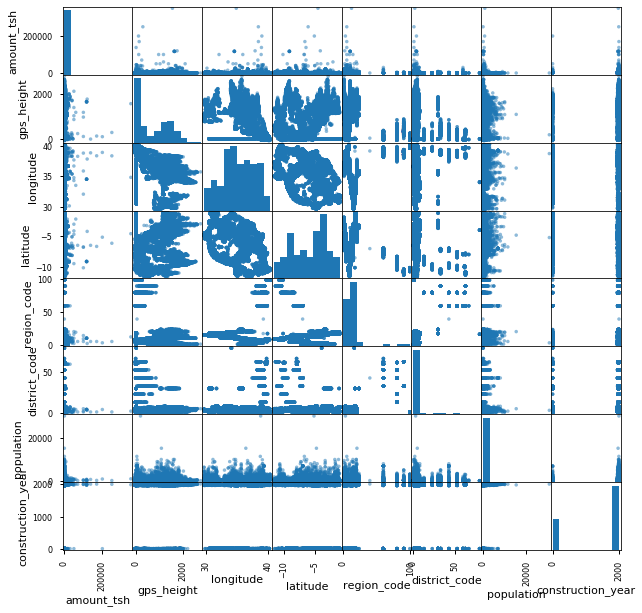

In [28]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

In [29]:
df.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
status_group              object
dtype: object

In [30]:
# boatloads of categoricals

## split x and y dfs

In [31]:
df['status_group']

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 57588, dtype: object

In [32]:
y = df['status_group']
X = df.drop('status_group', axis=1)

## one hot cats

In [33]:
X = pd.get_dummies(X)
X.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Arusha Urban,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,11,5,109,1999,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,20,2,280,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,21,4,250,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,90,63,58,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.0,0,31.130847,-1.825359,18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


- that's a crap load of columns. I'm going to drop some repeats because some of them are repeating information. 

## Feature selection - drop more columns that have repeat info

In [35]:
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

cols to delete:
- ward - Geographic location ** - don't need, has a million cats which = million columns


In [37]:
cols_to_drop = ['ward']
            # keep these others for now    
                #'extraction_type', 'extraction_type_group','management', 'payment',
       #'water_quality', 'quantity', 'source', 'source_class', 'waterpoint_type']
                
                
df.drop(columns = cols_to_drop ,axis=1, inplace=True)
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

## one hot cats

In [38]:
y = df['status_group']
X = df.drop('status_group', axis=1)

In [39]:
X = pd.get_dummies(X)
X.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Rural,lga_Arusha Urban,...,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,11,5,109,1999,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,20,2,280,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,21,4,250,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,90,63,58,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.0,0,31.130847,-1.825359,18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [40]:
y.head()

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

## train test split

In [41]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y, random_state=6)

# MODEL

## Timer class to time model fitting

In [42]:
## a timer to record how long a process takes
class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M:%S %p", 
                 start_timer=True,str_width=30,verbose=1):
        import tzlocal
        self._verbose = verbose
#         if verbose >1:
#             print('---'*20)
#             print('\tTIMER LOG')
#             print('---'*20)

        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        self._str_width = str_width
        
        self.created_at = self.get_time()# get time'

        
        self._log = []
#         self.log(f"[i] Timer created at \t{self.created_at.strftime(self.fmt):>{self._str_width}}",
#                 print_=False)
       
        if start_timer:
            self.start()
        
        
    def log(self,msg='',print_= None):
        if print_ is None:
            print_ = self._verbose         
        if print_>0:
            print(msg)
        self._log.append(msg)
        
    def _fmt_time(self,time_to_fmt):
        time_str = f"{time_to_fmt.strftime(self.fmt):>{self._str_width}}"
        return time_str
        
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.started_at = time
        msg = f"[i] Timer started at \t{self.started_at.strftime(self.fmt):>{self._str_width}}"
        self.log(msg,print_=None)#_log.append(msg)


        

    ## def stop
    def stop(self):
        time = self.get_time()
        self.ended_at = time
        self.duration = self.ended_at - self.started_at
        
    
        msg1 = f"[i] Timer ended at \t{self.ended_at.strftime(self.fmt):>{self._str_width}}"
        msg2 = f"\t\t\t- Total time = {self.duration}"

        if self._verbose==2:
            print_override=False
        else:
            print_override=True
                
        self.log(msg1,print_=print_override)#_log.append(msg1)

#         if self._verbose>1:
#             print('---'*20)
            

        self.log(msg2,print_=print_override)#,print_=True)
        if self._verbose==2:
            print(self.summary())
#
    def summary(self):
        dashes= '---'*20
#         print()
        
    
        summary = self._log.copy()
        
        summary =['\n',dashes,'\tTIMER LOG',dashes,
                  *summary,dashes]
        
#         summary.append()
#         summary.append(dashes)
        
#         if self._verbose>1:
#             summary.append(dashes)
        return '\n'.join(summary)
    
    
    def __repr__(self):
        return self.summary()

In [43]:
timer = Timer(verbose=2)#str_width=40)

timer.start()
timer.stop()
# type(timer)
# timer.log('cheese',False)
# timer

[i] Timer started at 	        05/10/20 - 03:45:43 PM
[i] Timer started at 	        05/10/20 - 03:45:43 PM


------------------------------------------------------------
	TIMER LOG
------------------------------------------------------------
[i] Timer started at 	        05/10/20 - 03:45:43 PM
[i] Timer started at 	        05/10/20 - 03:45:43 PM
[i] Timer ended at 	        05/10/20 - 03:45:43 PM
			- Total time = 0:00:00.000425
------------------------------------------------------------


## functions

In [45]:

## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf,importance_top_n):
    """Takes in your target, target predictions, classifier and an int for 
        number of features you want to display in a bar graph.
        Returns the bar graph of most important features 
        along with a confusion matrix from your classifier."""
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    # subplots for confusion matrix and bar plot
    fig, ax = plt.subplots(figsize=(12,6),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Blues",
                                  normalize='true', xticks_rotation='vertical', ax=ax[0])
    
    df_importance = pd.Series(clf.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(importance_top_n).plot(
        kind='barh', ax=ax[1])
#     top_features = df_importance.sort_values(ascending=True).tail(importance_top_n)
    
    ax[0].set(title='Confusion Matrix')
    ax[1].set(title='Top Important Features')
    y_score = clf.predict_proba(X_true)[:,1]

    plt.tight_layout()
    plt.show()
    
#     return top_features

In [46]:
## visualize the decision tree
def visualize_tree(clf,feature_names=None,class_names=['0','1','2'],
                   kws={},save_filename=None,format_='png',save_and_show=False):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz. Takes in fitted classifier,
        the feature names you want as a list (If none, then uses the column names from classifier),
        the class names for your target as a list, the filename to save it under, 
        the file format you want as a string (default is png), 
        and save and show as a boolean value. True to save file then display in notebook. 
        (default is to only save it.) 
        """
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(clf,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)
        if save_and_show:
            display(graph)
        else:
            print(f'[i] Tree saved as {save_filename}.{format_}')
    else:
        display(graph)

#     display(SVG(graph.pipe(format=format_)))#'svg')))

## Vanilla Decisiontree

In [47]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data



In [48]:
clf = DecisionTreeClassifier(random_state=6) # no params decided yet until grid search

# fit data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [49]:
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7533513926512468


In [50]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
0.7533513926512468


In [51]:
# need to do class imbalance
y_test.value_counts(normalize=True)

functional                 0.552962
non functional             0.381399
functional needs repair    0.065639
Name: status_group, dtype: float64

                         precision    recall  f1-score   support

             functional       0.81      0.79      0.80      7961
functional needs repair       0.34      0.37      0.35       945
         non functional       0.76      0.76      0.76      5491

               accuracy                           0.75     14397
              macro avg       0.63      0.64      0.64     14397
           weighted avg       0.76      0.75      0.75     14397



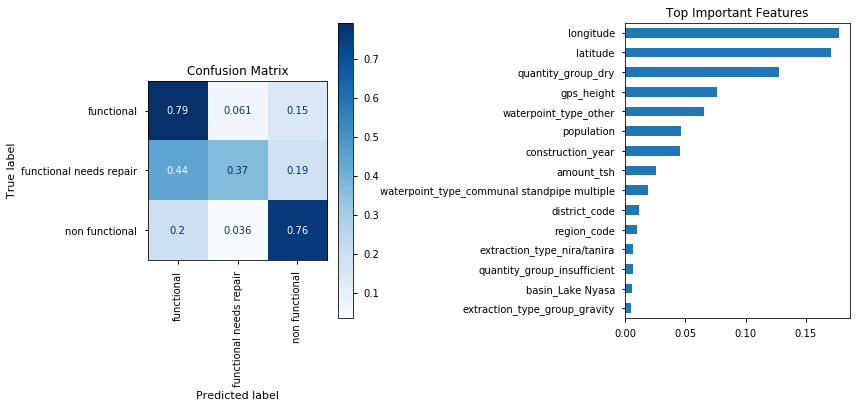

In [52]:
evaluate_model(y_test,y_preds,X_test,clf,15)

### vanilla tree eval

- Class functional and nonfunction are scoring pretty well, 0.8 and 0.77. 
- Functional need repair not so much with 0.38 recall. - means it only correctly classed 35%, with 44% incorrectly classed as functional. Need higher recall to get some of thosed missed that need repair.
- Important features seem to makes sense, with lat/long and location being telling, along with quantity (whether the well is dry or not)
- Construction year is different because there are still a lot of 0s in that column
- Management group could be related to poor management quality and tactics
- Extraction type gravity and source type borehole could be related

- Most telling signs, location (long/lat), how much water is left in the well (quantity_grp), sealevel (gps height)
- Theres a lot of 0s in the construction year column - should i change the zeros to unknown and use cat, or fil with 1900 and use as numeric.


### this tree visual is hashed out to save on load time. saved png is in folder as "vanilla_tree.png"

In [54]:
# timer = Timer(verbose=2)#str_width=40)
# timer.start()

# # visualize tree (save to file)
# # hashed out but can load with pickle below to save on load time


# vanilla_tree = visualize_tree(clf,save_filename="vanilla_tree")


# timer.stop()

## class imbalance SMOTE

In [53]:
## Check class
y_train.value_counts(normalize=True)

functional                 0.542428
non functional             0.388437
functional needs repair    0.069135
Name: status_group, dtype: float64

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X_train, smote_y_train = smote.fit_sample(X_train, y_train)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: Futur

In [55]:
pd.Series(smote_y_train).value_counts()

non functional             23428
functional needs repair    23428
functional                 23428
dtype: int64

##  Vanilla model with class imbalance resolved

In [56]:
# instantiate
clf = DecisionTreeClassifier(random_state=6) # no params decided yet until grid search

In [57]:
# fit data
clf.fit(smote_X_train,smote_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [58]:
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.7496006112384525


                         precision    recall  f1-score   support

             functional       0.82      0.77      0.79      7961
functional needs repair       0.31      0.43      0.36       945
         non functional       0.76      0.77      0.77      5491

               accuracy                           0.75     14397
              macro avg       0.63      0.66      0.64     14397
           weighted avg       0.76      0.75      0.75     14397



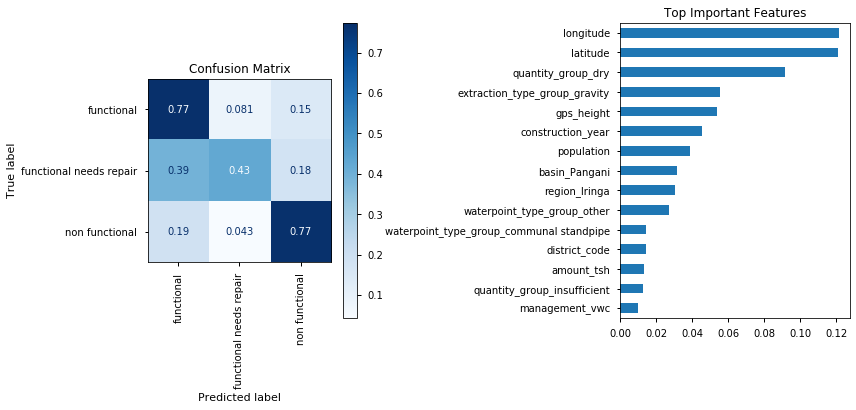

In [59]:
evaluate_model(y_test,y_preds,X_test,clf,15)

In [62]:
# old vanilla scores
#                          precision    recall  f1-score   support

#              functional       0.80      0.80      0.80      7848
# functional needs repair       0.36      0.35      0.35      1018
#          non functional       0.76      0.77      0.76      5531

#                accuracy                           0.75     14397
#               macro avg       0.64      0.64      0.64     14397
#            weighted avg       0.75      0.75      0.75     14397

### comments on class imbalance vanilla tree

- The accuracy score is pretty much the same
- Functional precision went up, funtional repair went down
- Functional recall went down, functional repair recall went up
- Functional repair and nonfunction f1 score both went up


## Feature selection - drop least important cols after vanilla tree model

### cols not listed in top features

In [60]:


cols_to_drop = ['region_code', 'district_code', 'lga', 'extraction_type',
       'extraction_type_class', 'payment',
       'payment_type', 'source', 'source_class']
                
df.drop(columns = cols_to_drop ,axis=1, inplace=True)

In [61]:
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'population', 'construction_year', 'extraction_type_group',
       'management', 'management_group', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source_type', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

cols to delete:
- basin - Geographic water basin ** - don't need, cat, using region code
- region - Geographic location ** - don't need, cat, using region code
- district_code - Geographic location (coded) ++ - don't need, using region code
- lga - Geographic location - local govt area, could be used for political question
- extraction_type - The kind of extraction the waterpoint uses ++ ** - don't need, has too many nondescript cats
- payment - What the water costs ** - don't need, repeat of payment type
- source - The source of the water ** - don't need, source type is more concise
- source_class - The source of the water ++ ** - don't need, source type has more descript groups

keep these for now
- extraction_type_group - The kind of extraction the waterpoint uses ++ ** - don't need, too many cats
- management - How the waterpoint is managed ++ ** - don't need, to many cats, have mgmt group to use instead
- water_quality - The quality of the water ** - don't need, less descript compared to quality group
- quantity - The quantity of water ** - don't need, repeat of quantity group
- waterpoint_type - The kind of waterpoint ** - don't need, waterpoint type group is more concise


## split df into X,y

In [62]:
y = df['status_group']
X = df.drop('status_group', axis=1)

## one hot cats

In [63]:
X = pd.get_dummies(X)
X.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,...,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,1390,34.938093,-9.856322,109,1999,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,280,2010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,25.0,686,37.460664,-3.821329,250,2009,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,58,1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.0,0,31.130847,-1.825359,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## train test split

In [64]:
## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,random_state=6)

## class imbalance SMOTE

In [65]:
## Check class
y_train.value_counts(normalize=True)

functional                 0.542428
non functional             0.388437
functional needs repair    0.069135
Name: status_group, dtype: float64

In [66]:
smote = SMOTE()
smote_X_train, smote_y_train = smote.fit_sample(X_train, y_train)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [67]:
pd.Series(smote_y_train).value_counts()

non functional             23428
functional needs repair    23428
functional                 23428
dtype: int64

## grid search for best Decision tree params

In [68]:
## Import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
## Instantiate classifier
clf = DecisionTreeClassifier(random_state=6)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[None, 5, 3, 10],
             'max_features':['auto',3,5,10,20,50,80,110],
             'min_samples_leaf':[1,2,0.1,0.2,0.5]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(clf,param_grid)

In [66]:
## hashed out to save on load time. took 17 minutes

# ## Start timer and fit search
# timer = Timer()
# timer.start()

# grid_clf.fit(smote_X_train, smote_y_train)
# ## Stop time and print best params
# timer.stop()
# grid_clf.best_params_

### pickle the tree grid to save load time

In [78]:
# # pickle a file for quick save state load
# import pickle
# filename = 'gridsearch_tree_pickle'
# outfile = open(filename,'wb')
# pickle.dump(grid_clf,outfile)
# outfile.close()

In [79]:
# # process to unpickle file
# infile = open(filename,'rb')
# new_grid_tree = pickle.load(infile)
# infile.close()

In [80]:
# # test if pickle load worked 
# # new_vanilla_tree)
# print(new_grid_tree==grid_tree)
# print(new_grid_tree.best_params_)

## New Decisiontree with gridsearch params

0.7432103910536917
                         precision    recall  f1-score   support

             functional       0.81      0.77      0.79      7961
functional needs repair       0.31      0.42      0.35       945
         non functional       0.76      0.75      0.76      5491

               accuracy                           0.74     14397
              macro avg       0.62      0.65      0.63     14397
           weighted avg       0.75      0.74      0.75     14397



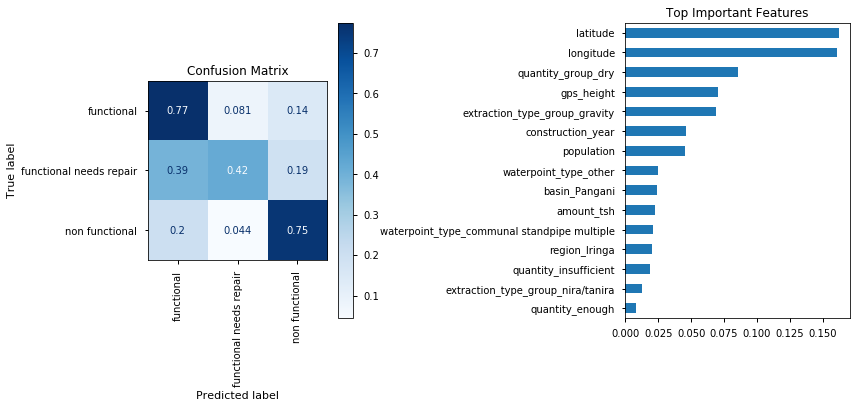

In [69]:
## Create a tree with the gridsearch's best params

best_params = {'criterion': 'entropy',
 'max_depth': None,
 'max_features': 110,
 'min_samples_leaf': 1}

grid_tree = DecisionTreeClassifier(**best_params, random_state=6)
grid_tree.fit(smote_X_train, smote_y_train)
print(grid_tree.score(X_test,y_test))

## Get predictions for train and test
y_preds = grid_tree.predict(X_test)

evaluate_model(y_test,y_preds,X_test,grid_tree,15)

In [75]:
# old smote tree results
#                          precision    recall  f1-score   support

#              functional       0.81      0.79      0.80      7848
# functional needs repair       0.35      0.40      0.37      1018
#          non functional       0.76      0.77      0.77      5531

#                accuracy                           0.75     14397
#               macro avg       0.64      0.65      0.65     14397
#            weighted avg       0.76      0.75      0.76     14397

### eval new tree model

- Functional precision went down, functional repair went up, 
- Functional recall went down, functional repair went up, nonfunc went down
- F1, functional and repair went down, nonfunc went up
- Looks like accuracy went down

### pickle the tree grid model

In [77]:
# # pickle a file for quick save state load
# import pickle
# gridsearchtree = 'gridsearch_tree_model_pickle'
# outfile = open(gridsearchtree,'wb')
# pickle.dump(grid_tree,outfile)
# outfile.close()

In [78]:
# # process to unpickle file
# infile = open(gridsearchtree,'rb')
# new_gridsearch_tree_model = pickle.load(infile)
# infile.close()

In [79]:
# # test if pickle load worked 

# print(new_gridsearch_tree_model.score(X_test,y_test))

# # Get predictions for train and test
# y_preds = new_gridsearch_tree_model.predict(X_test)

# evaluate_model(y_test,y_preds,X_test,new_gridsearch_tree_model,15)

## random forest

[i] Timer started at 	        05/10/20 - 03:50:12 PM
[i] Timer started at 	        05/10/20 - 03:50:12 PM
                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      7961
functional needs repair       0.37      0.41      0.39       945
         non functional       0.82      0.78      0.80      5491

               accuracy                           0.79     14397
              macro avg       0.67      0.68      0.67     14397
           weighted avg       0.79      0.79      0.79     14397



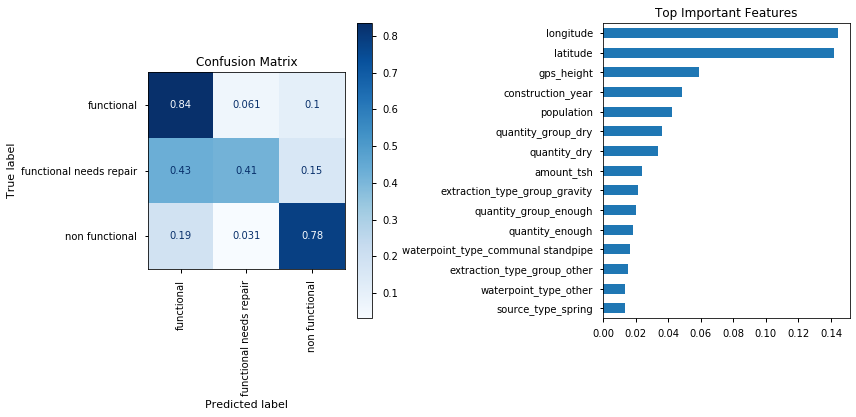

0.9999857720106995
0.787872473431965
[i] Timer ended at 	        05/10/20 - 03:51:03 PM
			- Total time = 0:00:50.561585


In [70]:
## Start timer and fit search
timer = Timer()
timer.start()


## Import Random Forest
from sklearn.ensemble import RandomForestClassifier
## Fit Random Forest
rf = RandomForestClassifier(random_state=6)
rf.fit(smote_X_train, smote_y_train)

## Get predictions and evaluate model
y_preds = rf.predict(X_test)
evaluate_model(y_test,y_preds,X_test, rf,15)

# check scores
print(rf.score(smote_X_train,smote_y_train))
print(rf.score(X_test,y_test))

## Stop time and print best params
timer.stop()



In [81]:
#                          precision    recall  f1-score   support

#              functional       0.80      0.78      0.79      7887
# functional needs repair       0.34      0.44      0.38       961
#          non functional       0.76      0.75      0.76      5549

#                accuracy                           0.74     14397
#               macro avg       0.63      0.66      0.64     14397
#            weighted avg       0.75      0.74      0.75     14397

### comments random forest

- Precision, func went up, func repair up, nonfunc up
- Recall func down, func repair down, nonfunc up
- F1 func up, repair func down, nonfunc up
- Accuracy score went up
- Best performance model so far

## Grid search for random forest best params

In [71]:
## Instantiate classifier
rf_clf = RandomForestClassifier(random_state=6)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[None, 5, 10],
             'max_features':['auto',3,20,50,100],
             'min_samples_leaf':[1,0.1,0.5]}

## Instantiate GridSearchCV
grid_rf = GridSearchCV(rf_clf,param_grid,cv=3)

In [84]:
# # hashed out to save on load time

# ## Start timer and fit search
# timer = Timer()
# timer.start()

# grid_rf.fit(smote_X_train, smote_y_train)
# ## Stop time and print best params
# timer.stop()
# grid_rf.best_params_

## create new random forest with gridsearch params

0.9999857720106995
0.7880113912620685
                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      7961
functional needs repair       0.38      0.42      0.40       945
         non functional       0.82      0.78      0.80      5491

               accuracy                           0.79     14397
              macro avg       0.67      0.68      0.68     14397
           weighted avg       0.79      0.79      0.79     14397



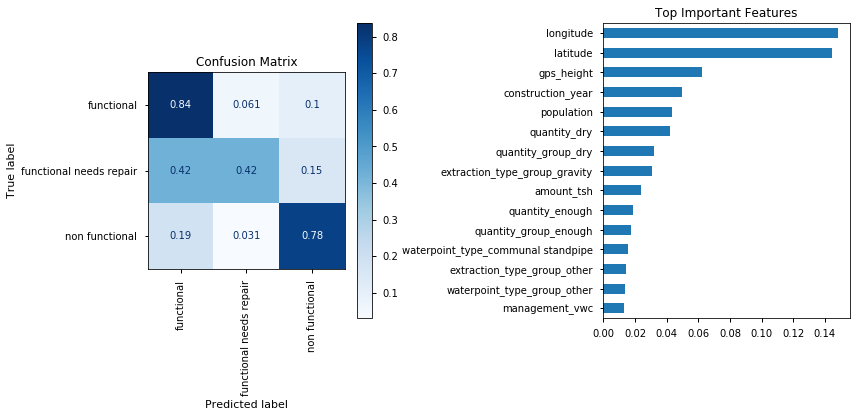

In [72]:
## Create a random forest with the gridsearch's best params

best_params_ = {'criterion': 'entropy',
                 'max_depth': None,
                 'max_features': 20,
                 'min_samples_leaf': 1}

# hard code in best params 
grid_rf = RandomForestClassifier(**best_params_, random_state=6)
grid_rf.fit(smote_X_train, smote_y_train)

# check scores
print(grid_rf.score(smote_X_train,smote_y_train))
print(grid_rf.score(X_test,y_test))

y_preds = grid_rf.predict(X_test)
evaluate_model(y_test,y_preds,X_test, grid_rf,15)




In [86]:
# old rf numbers
#                          precision    recall  f1-score   support

#              functional       0.82      0.83      0.83      7961
# functional needs repair       0.37      0.42      0.40       945
#          non functional       0.81      0.78      0.80      5491

#                accuracy                           0.79     14397
#               macro avg       0.67      0.68      0.67     14397
#            weighted avg       0.79      0.79      0.79     14397

### eval new randomforest grid model

- Judging from scores, looks like grid search rf is over fitting but I thought rf's were supposed to be resilient to that
- Recall, func went down
- F1 func repair went up, 
- Accuracy stayed the same
- So only slightly better. 

## XGBoost randomforest

### XGBRF with non SMOTE training data returns an error

In [73]:
## Start timer and fit search
timer = Timer()
timer.start()

## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier

## Fit and Evaluate
xgb_rf = XGBRFClassifier(random_state=6)
# xgb_rf.fit(smote_X_train, smote_y_train)
xgb_rf.fit(smote_X_train, smote_y_train)


# print(xgb_rf.score(smote_X_train,smote_y_train))
print(xgb_rf.score(X_train,y_train))

print(xgb_rf.score(X_test,y_test))

y_preds = xgb_rf.predict(X_test)

evaluate_model(y_test,y_preds,X_test,xgb_rf,15)

## Stop time
timer.stop()

[i] Timer started at 	        05/10/20 - 03:52:32 PM
[i] Timer started at 	        05/10/20 - 03:52:32 PM


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109'] ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year', 'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'region_Arusha', 'region_Dar es Salaam', 'region_Dodoma', 'region_Iringa', 'region_Kagera', 'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara', 'region_Mara', 'region_Mbeya', 'region_Morogoro', 'region_Mtwara', 'region_Mwanza', 'region_Pwani', 'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga', 'region_Singida', 'region_Tabora', 'region_Tanga', 'extraction_type_group_afridev', 'extraction_type_group_gravity', 'extraction_type_group_india mark ii', 'extraction_type_group_india mark iii', 'extraction_type_group_mono', 'extraction_type_group_nira/tanira', 'extraction_type_group_other', 'extraction_type_group_other handpump', 'extraction_type_group_other motorpump', 'extraction_type_group_rope pump', 'extraction_type_group_submersible', 'extraction_type_group_swn 80', 'extraction_type_group_wind-powered', 'management_company', 'management_other', 'management_other - school', 'management_parastatal', 'management_private operator', 'management_trust', 'management_unknown', 'management_vwc', 'management_water authority', 'management_water board', 'management_wua', 'management_wug', 'management_group_commercial', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'water_quality_coloured', 'water_quality_fluoride', 'water_quality_fluoride abandoned', 'water_quality_milky', 'water_quality_salty', 'water_quality_salty abandoned', 'water_quality_soft', 'water_quality_unknown', 'quality_group_colored', 'quality_group_fluoride', 'quality_group_good', 'quality_group_milky', 'quality_group_salty', 'quality_group_unknown', 'quantity_dry', 'quantity_enough', 'quantity_insufficient', 'quantity_seasonal', 'quantity_unknown', 'quantity_group_dry', 'quantity_group_enough', 'quantity_group_insufficient', 'quantity_group_seasonal', 'quantity_group_unknown', 'source_type_borehole', 'source_type_dam', 'source_type_other', 'source_type_rainwater harvesting', 'source_type_river/lake', 'source_type_shallow well', 'source_type_spring', 'waterpoint_type_cattle trough', 'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam', 'waterpoint_type_hand pump', 'waterpoint_type_improved spring', 'waterpoint_type_other', 'waterpoint_type_group_cattle trough', 'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam', 'waterpoint_type_group_hand pump', 'waterpoint_type_group_improved spring', 'waterpoint_type_group_other']
expected f90, f35, f94, f12, f71, f61, f22, f81, f89, f31, f98, f28, f105, f91, f77, f17, f56, f42, f20, f6, f93, f57, f100, f92, f95, f55, f108, f97, f19, f70, f101, f58, f13, f21, f41, f46, f26, f106, f109, f53, f96, f62, f80, f59, f50, f33, f54, f107, f37, f36, f47, f9, f65, f27, f5, f29, f85, f1, f73, f11, f99, f102, f79, f88, f67, f38, f15, f103, f63, f7, f34, f39, f52, f16, f45, f3, f24, f78, f30, f48, f60, f10, f66, f43, f32, f51, f4, f14, f2, f64, f18, f8, f74, f69, f82, f83, f75, f25, f104, f76, f86, f68, f23, f72, f49, f0, f40, f84, f44, f87 in input data
training data did not have the following fields: region_Tabora, extraction_type_group_india mark ii, region_Rukwa, extraction_type_group_other handpump, extraction_type_group_swn 80, management_other - school, region_Tanga, region_Ruvuma, waterpoint_type_hand pump, source_type_other, quantity_group_unknown, quantity_group_seasonal, management_vwc, region_Iringa, region_Manyara, source_type_spring, extraction_type_group_nira/tanira, waterpoint_type_improved spring, quantity_insufficient, waterpoint_type_communal standpipe, management_private operator, waterpoint_type_group_dam, source_type_dam, extraction_type_group_submersible, source_type_river/lake, basin_Lake Nyasa, quantity_group_insufficient, region_Dodoma, construction_year, management_water authority, basin_Lake Victoria, quantity_enough, basin_Internal, source_type_rainwater harvesting, management_unknown, extraction_type_group_other, extraction_type_group_other motorpump, extraction_type_group_rope pump, region_Kagera, region_Morogoro, waterpoint_type_group_cattle trough, waterpoint_type_communal standpipe multiple, region_Mtwara, waterpoint_type_group_other, management_other, management_water board, region_Kilimanjaro, management_group_user-group, region_Kigoma, quality_group_salty, water_quality_unknown, water_quality_fluoride, region_Mwanza, management_parastatal, water_quality_coloured, quality_group_unknown, region_Singida, water_quality_salty, region_Pwani, quantity_group_dry, basin_Lake Rukwa, region_Shinyanga, region_Dar es Salaam, management_wua, region_Mbeya, source_type_borehole, gps_height, waterpoint_type_group_hand pump, population, management_group_commercial, management_group_parastatal, quality_group_colored, quantity_unknown, water_quality_salty abandoned, region_Arusha, management_wug, water_quality_fluoride abandoned, quantity_dry, waterpoint_type_cattle trough, extraction_type_group_afridev, water_quality_milky, basin_Pangani, quality_group_fluoride, basin_Lake Tanganyika, management_trust, waterpoint_type_group_improved spring, waterpoint_type_dam, amount_tsh, basin_Rufiji, extraction_type_group_india mark iii, extraction_type_group_gravity, water_quality_soft, extraction_type_group_wind-powered, management_company, extraction_type_group_mono, region_Lindi, quantity_seasonal, longitude, quality_group_good, waterpoint_type_group_communal standpipe, region_Mara, quality_group_milky, management_group_unknown, latitude, basin_Wami / Ruvu, source_type_shallow well, basin_Ruvuma / Southern Coast, waterpoint_type_other, management_group_other, quantity_group_enough

In [88]:
smote_X_train

array([[0.00000000e+00, 1.20100000e+03, 3.68201503e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 4.70000000e+01, 3.90938017e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 1.53800000e+03, 3.74490016e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.00000000e+02, 1.20439619e+03, 3.76642084e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.30053584e+02, 3.90300429e+01, ...,
        0.00000000e+00, 0.00000000e+00, 5.26791798e-01],
       [0.00000000e+00, 0.00000000e+00, 3.35706116e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### turned SMOTE training data into dataframe. XGBRF was returning error if entered SMOTE training data as an array

In [74]:
smote_X_train_df = pd.DataFrame(smote_X_train,columns=X_test.columns)


In [75]:
smote_X_train_df.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,...,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,1201.0,36.820150,-3.369736,120.0,2011.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,25.0,47.0,39.093802,-6.648229,193.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.0,1538.0,37.449002,-3.307395,15.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1923.0,35.357620,-4.077079,1.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1236.0,37.103310,-3.201124,1.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### XGBRF with SMOTE dataframe

[i] Timer started at 	        05/10/20 - 04:04:33 PM
[i] Timer started at 	        05/10/20 - 04:04:33 PM
0.6315093051050026
0.6102660276446482
                         precision    recall  f1-score   support

             functional       0.69      0.74      0.71      7961
functional needs repair       0.15      0.48      0.23       945
         non functional       0.87      0.45      0.59      5491

               accuracy                           0.61     14397
              macro avg       0.57      0.56      0.51     14397
           weighted avg       0.72      0.61      0.63     14397



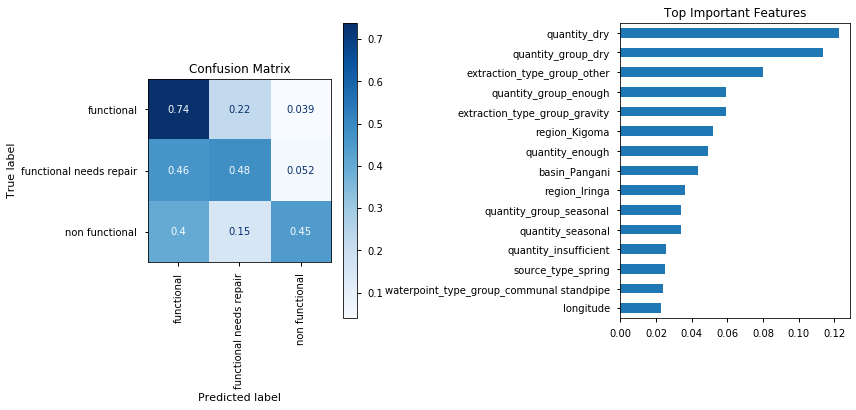

[i] Timer ended at 	        05/10/20 - 04:07:15 PM
			- Total time = 0:02:42.235801


In [76]:
## Start timer and fit search
timer = Timer()
timer.start()

## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier

## Fit and Evaluate
xgb_rf = XGBRFClassifier(random_state=6)
xgb_rf.fit(smote_X_train_df, smote_y_train)


print(xgb_rf.score(smote_X_train_df,smote_y_train))
print(xgb_rf.score(X_test,y_test))

y_preds = xgb_rf.predict(X_test)

evaluate_model(y_test,y_preds,X_test,xgb_rf,15)

## Stop time
timer.stop()

### comments on XGB

> Looks like testing performed better than training. Don't know how.

## Grid search for XGB random forest

In [77]:
## Instantiate classifier
xgb_rf = XGBRFClassifier(random_state=6)

## Set up param grid
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [5],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100],
    'colsample_bynode': [0.8],
    'num_parallel_tree': [100],
    'objective': ['reg:squarederror']
}

## Instantiate GridSearchCV
grid_xgb_rf = GridSearchCV(xgb_rf,param_grid, scoring='accuracy', cv=None, n_jobs=1)

In [131]:
# # hashed out to save on load time

# ## Start timer and fit search
# timer = Timer()
# timer.start()

# grid_xgb_rf.fit(smote_X_train, smote_y_train)
# ## Stop time and print best params
# timer.stop()
# grid_xgb_rf.best_params_

[i] Timer started at 	        05/01/20 - 02:05:24 PM
[i] Timer started at 	        05/01/20 - 02:05:24 PM
[i] Timer ended at 	        05/01/20 - 02:26:00 PM
			- Total time = 0:20:35.824650


{'colsample_bynode': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 30,
 'num_parallel_tree': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

## create new xgb random forest with gridsearch params 

[i] Timer started at 	        05/10/20 - 04:07:15 PM
[i] Timer started at 	        05/10/20 - 04:07:15 PM
0.6891184337829378
0.6618740015280962
                         precision    recall  f1-score   support

             functional       0.75      0.75      0.75      7961
functional needs repair       0.17      0.48      0.26       945
         non functional       0.82      0.56      0.66      5491

               accuracy                           0.66     14397
              macro avg       0.58      0.60      0.56     14397
           weighted avg       0.74      0.66      0.69     14397



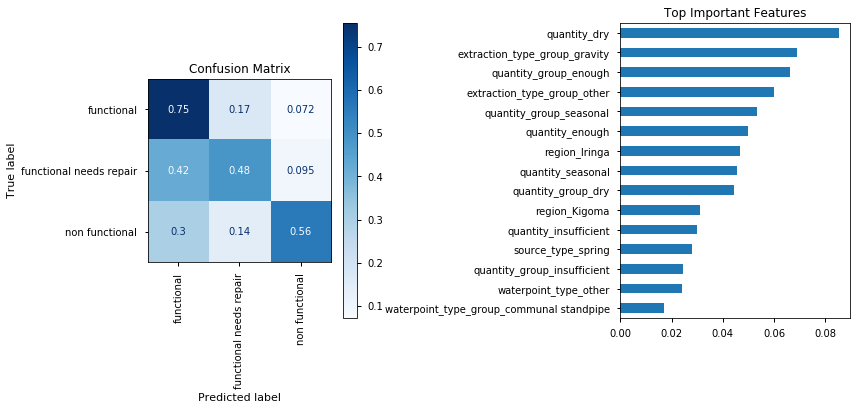

[i] Timer ended at 	        05/10/20 - 04:08:43 PM
			- Total time = 0:01:27.561826


In [78]:
## Create an xgb random forest with the gridsearch's best params


best_params = {'colsample_bynode': 0.8,
             'learning_rate': 0.1,
             'max_depth': 5,
             'min_child_weight': 10,
             'n_estimators': 30,
             'num_parallel_tree': 100,
             'objective': 'reg:squarederror',
             'subsample': 0.7}

## Start timer and fit search
timer = Timer()
timer.start()

grid_xgbrf_bestparams = XGBRFClassifier(**best_params, random_state=6)
grid_xgbrf_bestparams.fit(smote_X_train_df, smote_y_train)

# check scores
print(grid_xgbrf_bestparams.score(smote_X_train_df,smote_y_train))
print(grid_xgbrf_bestparams.score(X_test,y_test))

y_preds = grid_xgbrf_bestparams.predict(X_test)
evaluate_model(y_test,y_preds,X_test, grid_xgbrf_bestparams,15)


## Stop time
timer.stop()

### eval new randomforest grid model

- It's performing mediocre at best. Can barely predict above 50% for nonfunctional pumps.
- Random forest with best params peformed better with accuracy score of .79, compared to this .67.

# Final best model - Randomforest

[i] Timer started at 	        05/10/20 - 04:08:43 PM
[i] Timer started at 	        05/10/20 - 04:08:43 PM
                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      7961
functional needs repair       0.38      0.42      0.40       945
         non functional       0.82      0.78      0.80      5491

               accuracy                           0.79     14397
              macro avg       0.67      0.68      0.68     14397
           weighted avg       0.79      0.79      0.79     14397



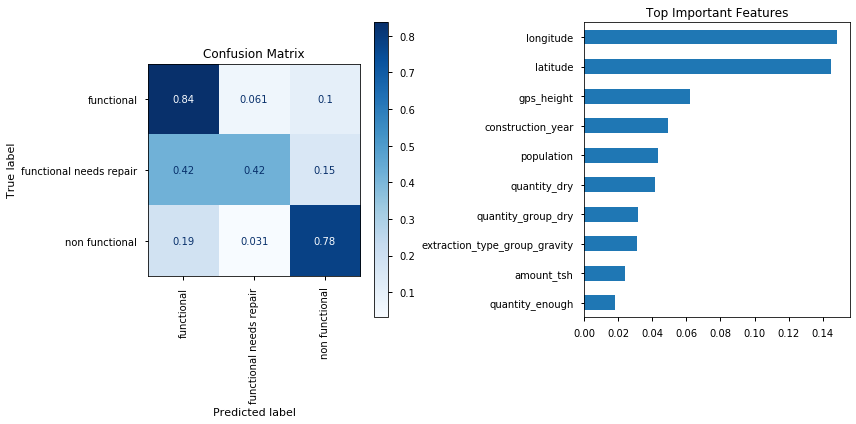

[i] Timer ended at 	        05/10/20 - 04:10:03 PM
			- Total time = 0:01:19.905944


In [79]:
## Start timer and fit search
timer = Timer()
timer.start()


# ## Fit model
best_params = {'criterion': 'entropy',
                 'max_depth': None,
                 'max_features': 20,
                 'min_samples_leaf': 1}

# hard code in best params 
grid_rf = RandomForestClassifier(**best_params, random_state=6)
grid_rf.fit(smote_X_train, smote_y_train)

# eval model
y_preds = grid_rf.predict(X_test)
evaluate_model(y_test,y_preds,X_test, grid_rf,10)

## Stop time
timer.stop()

In [81]:
print(grid_rf.score(smote_X_train,smote_y_train))
print(grid_rf.score(X_test,y_test))

0.9999857720106995
0.7880113912620685


# iNTERPRET

### Partial Dependence Plots
Will show how each feature effects classification.

In [82]:
top_features = pd.Series(grid_rf.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
feature_names = [i for i in X_test.columns if X_test[i].dtype in [np.int64] or [np.float64]]


In [83]:
top_features

longitude                        0.148220
latitude                         0.144684
gps_height                       0.062059
construction_year                0.049454
population                       0.043126
quantity_dry                     0.041890
quantity_group_dry               0.031925
extraction_type_group_gravity    0.031025
amount_tsh                       0.023807
quantity_enough                  0.018462
dtype: float64

In [84]:
# don't know how to get indexes from top features so doing it manually
top_features_list = ['longitude','latitude', 'gps_height','construction_year', 'quantity_dry','population',
                     'quantity_group_dry','extraction_type_group_gravity','amount_tsh', 'quantity_group_enough']

In [85]:
# install pdp if you don't have it
# !pip install pdpbox

In [86]:
feature_names

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year',
 'basin_Internal',
 'basin_Lake Nyasa',
 'basin_Lake Rukwa',
 'basin_Lake Tanganyika',
 'basin_Lake Victoria',
 'basin_Pangani',
 'basin_Rufiji',
 'basin_Ruvuma / Southern Coast',
 'basin_Wami / Ruvu',
 'region_Arusha',
 'region_Dar es Salaam',
 'region_Dodoma',
 'region_Iringa',
 'region_Kagera',
 'region_Kigoma',
 'region_Kilimanjaro',
 'region_Lindi',
 'region_Manyara',
 'region_Mara',
 'region_Mbeya',
 'region_Morogoro',
 'region_Mtwara',
 'region_Mwanza',
 'region_Pwani',
 'region_Rukwa',
 'region_Ruvuma',
 'region_Shinyanga',
 'region_Singida',
 'region_Tabora',
 'region_Tanga',
 'extraction_type_group_afridev',
 'extraction_type_group_gravity',
 'extraction_type_group_india mark ii',
 'extraction_type_group_india mark iii',
 'extraction_type_group_mono',
 'extraction_type_group_nira/tanira',
 'extraction_type_group_other',
 'extraction_type_group_other handpump',
 'extraction_type_group

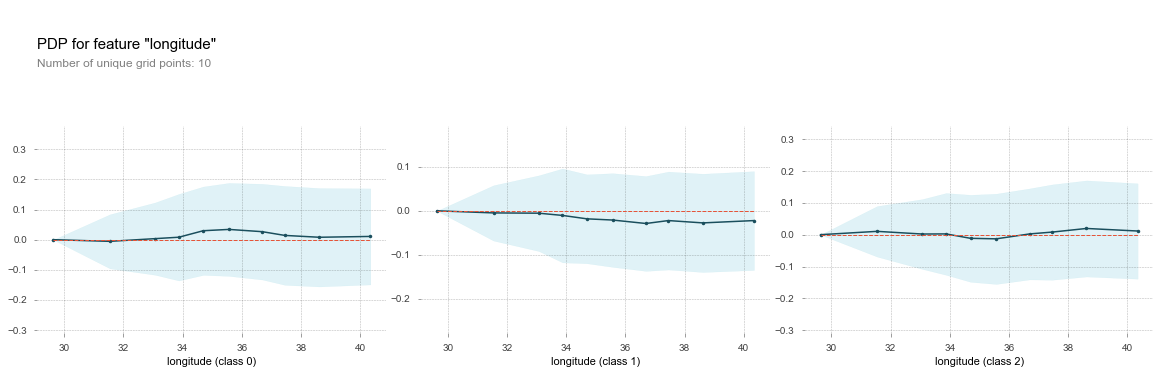

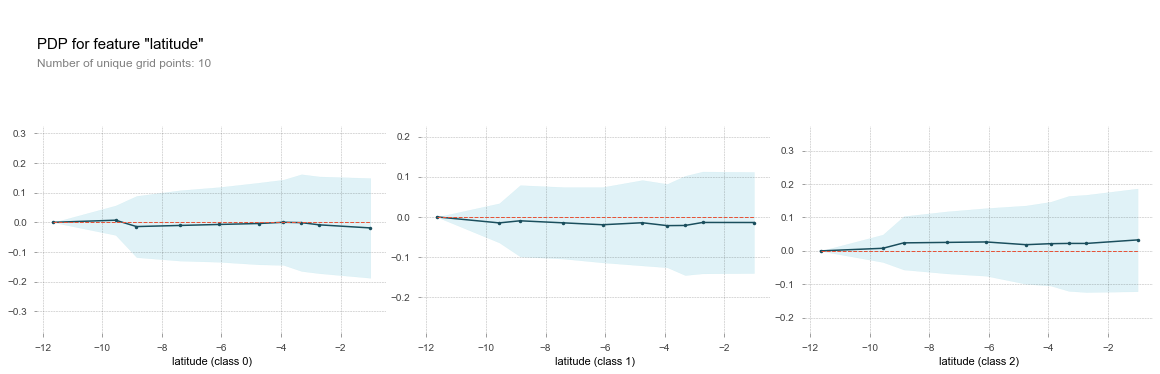

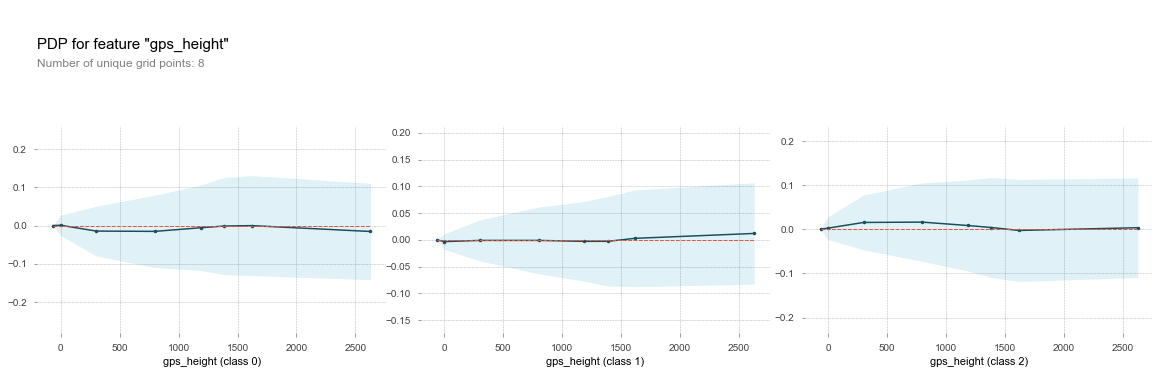

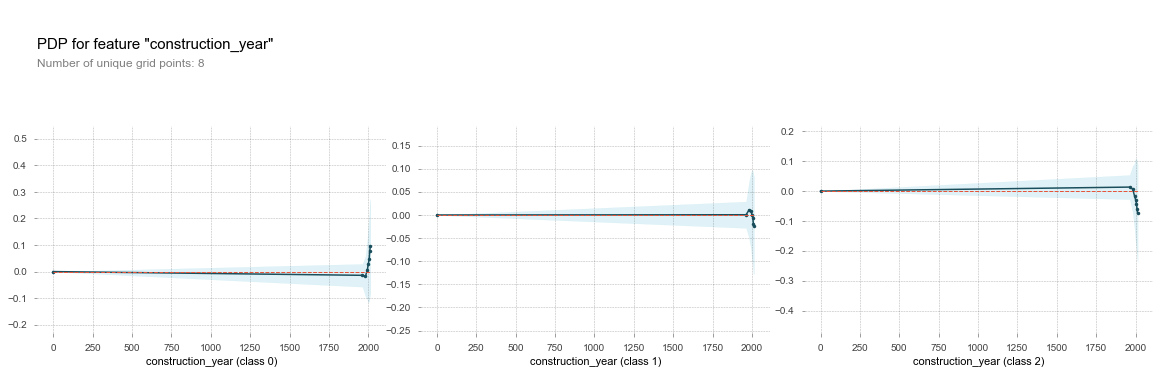

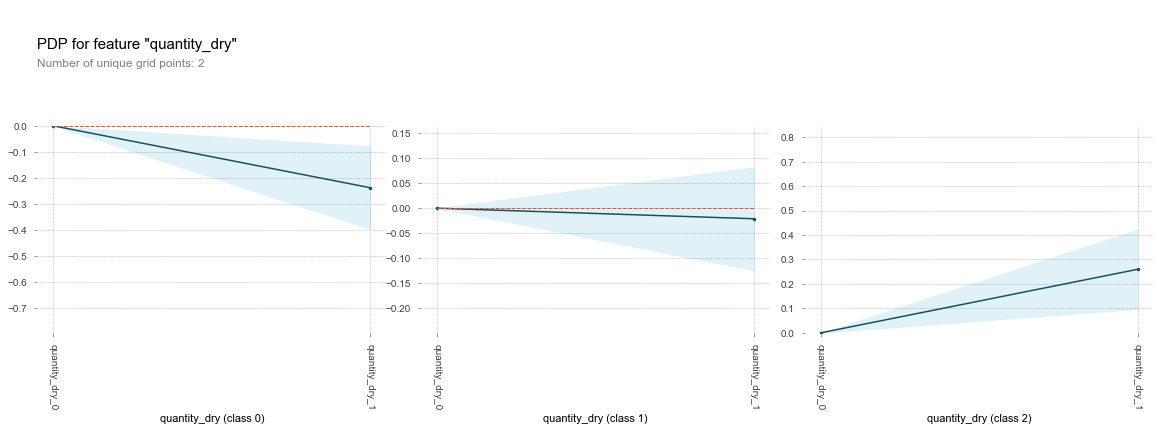

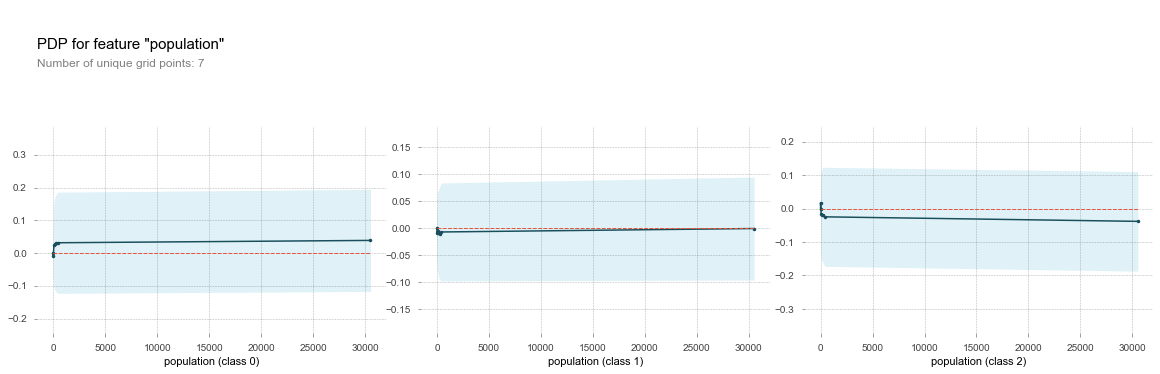

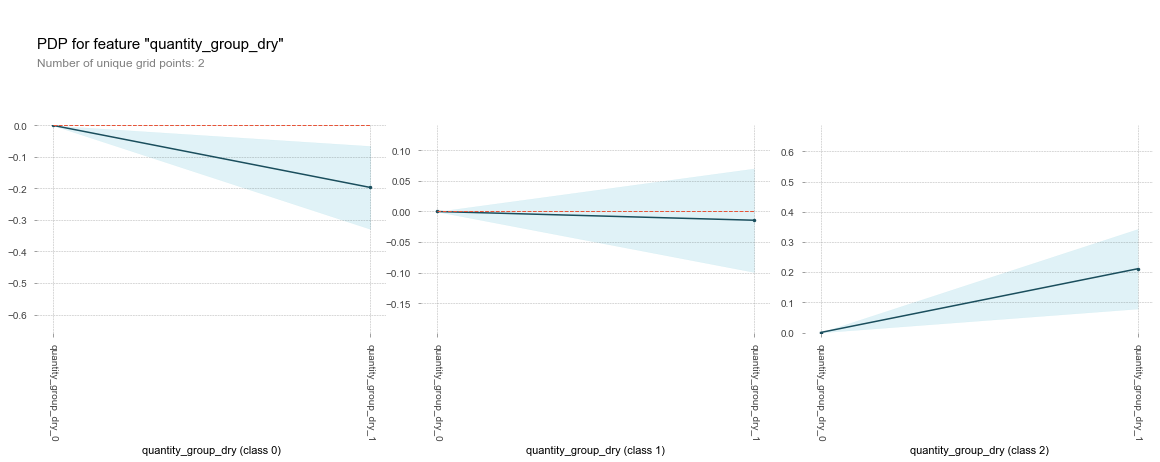

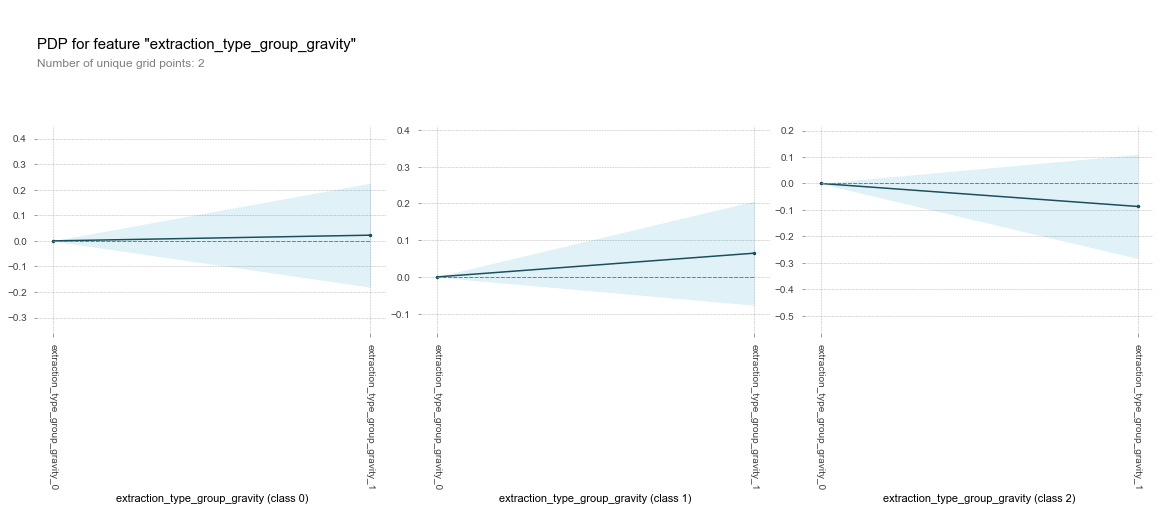

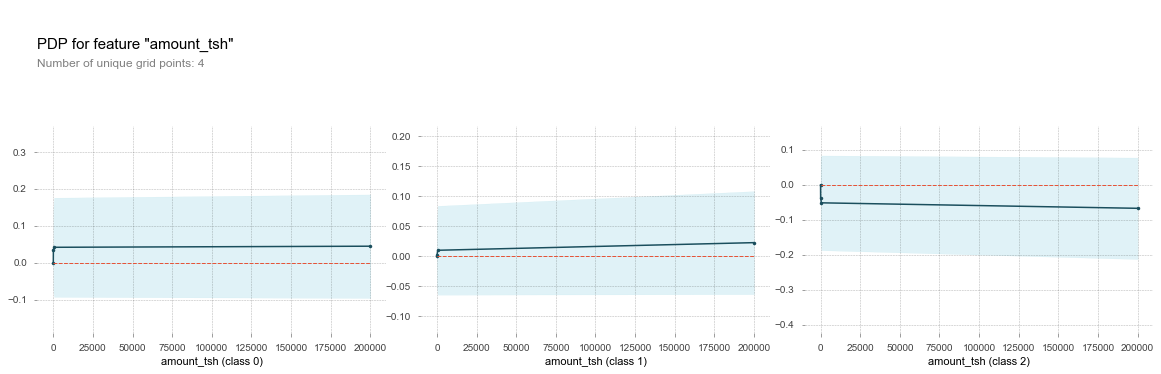

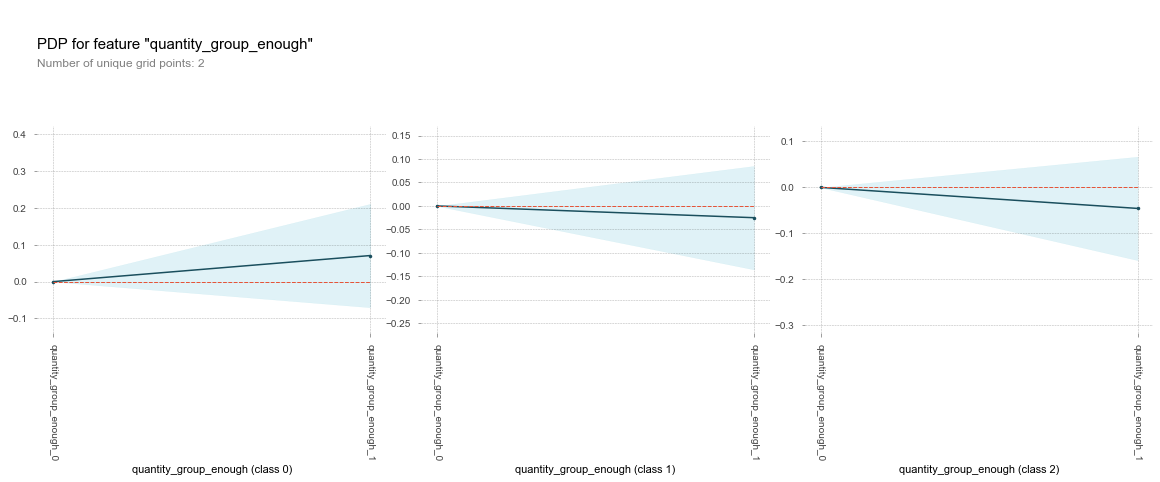

In [87]:
# from sklearn.inspection import plot_partial_dependence as pdp

from pdpbox import pdp, get_dataset, info_plots
    
for feat in top_features_list:
    
    pdp_dist = pdp.pdp_isolate(model=grid_rf, dataset=X_test, model_features=feature_names, feature=feat)
    
    plot_params = {
            # plot title and subtitle
            'title': 'PDP for feature "%s"' % feat,
#             'subtitle': "Number of unique grid points: %d" % n_grids,
            'title_fontsize': 15,
            'subtitle_fontsize': 12,
            'font_family': 'Arial',
            # matplotlib color map for ICE lines
            'line_cmap': 'Blues',
            'xticks_rotation': -90,
            # pdp line color, highlight color and line width
            'pdp_color': '#1A4E5D',
            'pdp_hl_color': '#FEDC00',
            'pdp_linewidth': 1.5,
            # horizon zero line color and with
            'zero_color': '#E75438',
            'zero_linewidth': 1,
            # pdp std fill color and alpha
            'fill_color': '#66C2D7',
            'fill_alpha': 0.2,
            # marker size for pdp line
            'markersize': 3.5}
    
    pdp.pdp_plot(pdp_dist, feat, figsize=(20,6), ncols=3, plot_params=plot_params)
    plt.show()

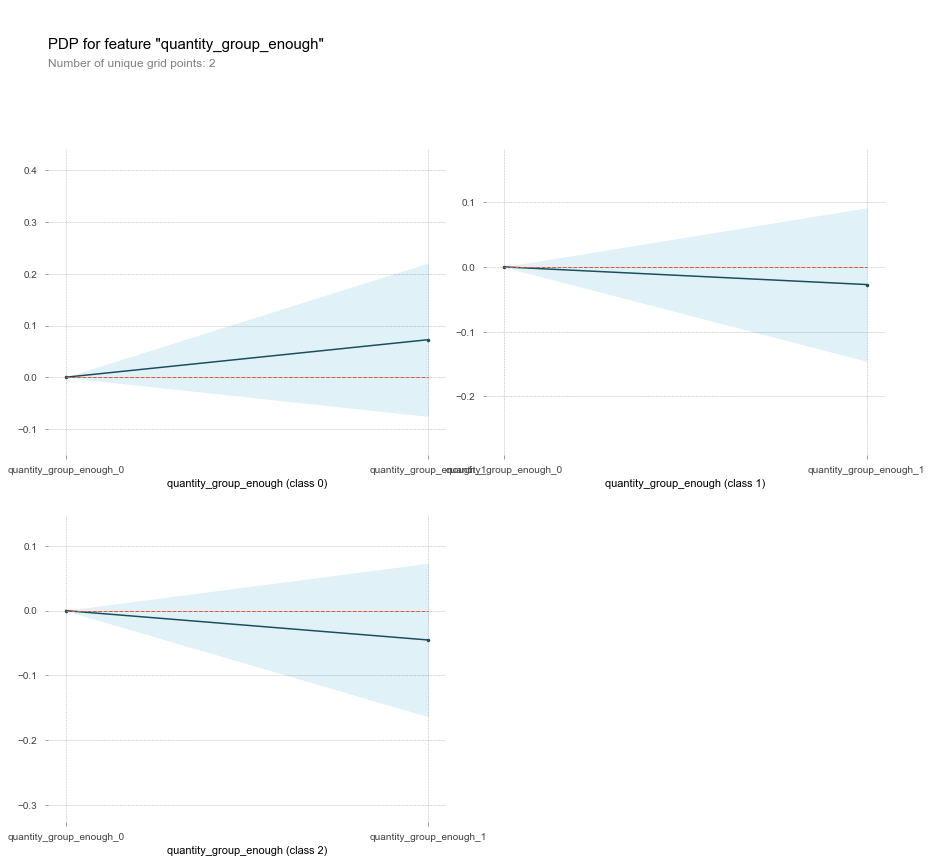

In [149]:
# fig =  pdp.pdp_plot(pdp_dist, feat)
# fig[0].get_axes()

# CONCLUSIONS & RECOMMENDATIONS

Location (Latitude and Longitude): 
> Wells are classified as functioning between 34-37 degrees longitude. You'll see that backed up by viewing the classification of nonfunctional for longitude as being near opposite in results, showing most telling below 34 deg longitude and above 37 degrees. Latitude classifies functioning best at -9.5 and -3 degrees. Repairs are needed mainly at pumps along latitude -11.5 degrees. Nonfunctioning pumps will be along latitudes from -9 to -1. Nonfunctional pumps will be located mostly between 250 and 1250 sea level. Perhaps a well has to work harder and requires more materials if the pump is higher above sea level which means more things that could break. 

Population:
> It seems that the lower population and remote wells are more likely to be nonfunctional. Could be because of less people around to notify authorities of the problem and is not needed. Pumps near high population on the other hand, have a higher chance of needing repair. So it'd be best to focus on repairs to wells near populations who need it most and then get to non-populated pumps second.

Gravity extraction pumps:
> Gravity extraction type pumps have a high chance of needing repair, but are often still functional, so check on those pumps as priority and also focus on not building more of that type, focusing on more resilient type of pumps. 

For future feature selection and engineering: 
- Look at skewed 0s in long, lat that I removed, population, cnstruction year and amount tsh. 
- Construction year is very skewed but still important because the older wells could be falling apart. You'll see that the older a pump is the higher chance of it being nonfunctional or in need of repair. 
- If the well is dry, then the pump is most likely broken or in need of repair, although fixing it should be lower priority since it is not in use.  
- Lower total static head amount shows a higher chance of being broken. Pumps at 0 tsh are most likely broken. 
- Quantity labeled as enough most likely functioning. 

# Competition run final test data

In [114]:
testdata = pd.read_csv('testsetvalues.csv')

In [115]:
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'population', 'construction_year', 'extraction_type_group',
       'management', 'management_group', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source_type', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [116]:
testdata.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [117]:
cols_to_drop = ['date_recorded', 'funder',
       'installer', 'wpt_name', 'num_private',
        'subvillage', 'region_code', 'district_code', 'lga',
       'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_class',
    'payment', 'payment_type',
       'source', 'source_class']
                
testdata.drop(columns = cols_to_drop ,axis=1, inplace=True)

In [118]:
testdata.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'population', 'construction_year', 'extraction_type_group',
       'management', 'management_group', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source_type', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### drop 0 deg long and -2e-8 lat rows 

In [119]:
for col in testdata.columns:
    print(testdata[col].value_counts())

4094     1
39654    1
35588    1
58105    1
27384    1
        ..
1514     1
5608     1
26086    1
19939    1
65536    1
Name: id, Length: 14850, dtype: int64
0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
200000.0        1
100000.0        1
70000.0         1
2550.0          1
7000.0          1
Name: amount_tsh, Length: 68, dtype: int64
 0       5211
-19        18
 1294      18
 1343      18
 1283      17
         ... 
 722        1
 698        1
 2126       1
 674        1
 2023       1
Name: gps_height, Length: 2157, dtype: int64
0.000000     457
37.302281      2
32.920579      2
37.260069      2
39.080573      2
            ... 
30.926134      1
37.227967      1
36.032819      1
35.628949      1
35.894087      1
Name: longitude, Length: 14390, dtype: int64
-2.000000e-08    457
-7.105919e+00      2
-2.474560e+00      2
-7.170666e+00      2
-6.990042e+00      2
                ... 
-9.320133e+00      1
-9.114386e+00      1
-

In [120]:
testdata.shape

(14850, 19)

In [121]:
prediction_id = testdata['id']
testdata = testdata.drop('id', axis=1)

In [122]:
prediction_id.head()

0    50785
1    51630
2    17168
3    45559
4    49871
Name: id, dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 19 columns):
amount_tsh               57588 non-null float64
gps_height               57588 non-null int64
longitude                57588 non-null float64
latitude                 57588 non-null float64
basin                    57588 non-null object
region                   57588 non-null object
population               57588 non-null int64
construction_year        57588 non-null int64
extraction_type_group    57588 non-null object
management               57588 non-null object
management_group         57588 non-null object
water_quality            57588 non-null object
quality_group            57588 non-null object
quantity                 57588 non-null object
quantity_group           57588 non-null object
source_type              57588 non-null object
waterpoint_type          57588 non-null object
waterpoint_type_group    57588 non-null object
status_group             57588 non-null objec

In [124]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 18 columns):
amount_tsh               14850 non-null float64
gps_height               14850 non-null int64
longitude                14850 non-null float64
latitude                 14850 non-null float64
basin                    14850 non-null object
region                   14850 non-null object
population               14850 non-null int64
construction_year        14850 non-null int64
extraction_type_group    14850 non-null object
management               14850 non-null object
management_group         14850 non-null object
water_quality            14850 non-null object
quality_group            14850 non-null object
quantity                 14850 non-null object
quantity_group           14850 non-null object
source_type              14850 non-null object
waterpoint_type          14850 non-null object
waterpoint_type_group    14850 non-null object
dtypes: float64(3), int64(3), object(12)
memo

In [125]:
onehot_testdata = pd.get_dummies(testdata)
onehot_testdata.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,...,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,1996,35.290799,-4.059696,321,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.0,1569,36.656709,-3.309214,300,2000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0.0,1567,34.767863,-5.004344,500,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0.0,267,38.058046,-9.418672,250,1987,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,500.0,1260,35.006123,-10.950412,60,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


# final data predictions for contest

In [134]:
y_preds = grid_rf.predict(onehot_testdata)
predictions = pd.DataFrame(y_preds)
predictions.head()

,0
0,non functional
1,functional needs repair
2,functional
3,non functional
4,functional


In [135]:
predictions.columns =['status_group'] 

In [136]:
predictions.head()

,status_group
0,non functional
1,functional needs repair
2,functional
3,non functional
4,functional


In [137]:
prediction_id = pd.DataFrame(prediction_id)

In [138]:
prediction_id.head()

,id
0,50785
1,51630
2,17168
3,45559
4,49871


In [139]:
prediction_id['status_group'] = predictions['status_group']
prediction_id.head()

,id,status_group
0,50785,non functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional


In [140]:
prediction_id.shape

(14850, 2)

In [165]:
# prediction_id.to_csv ('predictiondf_2.csv', index = False, header=True)